# Data format and SED data

In [1]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc7


In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## Data format for Data object


The SED data are internally stored as astropy tables, but it is very easy to import from

 1. ascii files
 2. numpy array in general
 
once that is clear the data format. The easiest way to understand the data format is to build an empty table to have a look at the structure of the table:

In [3]:
from jetset.data_loader import Data
data=Data(n_rows=10)

we can easily access the astropy table

In [4]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (s cm2),erg / (s cm2),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes16
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
0.0,0.0,0.0,0.0,0.0,0.0,False,0.0


- ``x`` column is reserved to frequencies (mandatory)
- ``y`` columm is reserved to fluxes  (mandatory)
- ``dx`` columm is reserved to the error on the frequency,or bin width
- ``dy`` columm is reserved to the  error on the fluxes
- ``UL`` columm is reserved to the flag for Upper Limit 
- ``T_start`` and ``T_stop`` are used to identify the time range to select data using the  class `ObsData`
- ``data_set``

In [5]:
data.table['x']

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


columns with units are implemented using the `Units` module of astropy (https://docs.astropy.org/en/stable/units/).

and we can easily access the metadata

In [6]:
data.metadata

OrderedDict([('z', 0),
             ('UL_CL', 0.95),
             ('restframe', 'obs'),
             ('data_scale', 'lin-lin'),
             ('obj_name', 'new-src')])

- ``z``: the redshift of the object
- ``UL_CL``: the CL for the UL
- ``restframe``:  possible values``obs`` or ``src``, indicating if the data are observed flux, or luminosities, respectively
- ``data_scale``: possible values``lin-lin`` or ``log-log``,  indicating if the data are in linear or logarithmic scale, respectively
- ``obj_name``: the name of the object


### Loading from astropy table


you can use the default SEDs distributed with the package to get familiar with data handling

In [7]:
from jetset.test_data_helper import  test_SEDs
test_SEDs

['/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_ABS.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']

In [8]:
from jetset.data_loader import Data

In [9]:
data=Data.from_file(data_table=test_SEDs[1])

In [10]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (s cm2),erg / (s cm2),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,str13
2299540000.0,0.0,1.3409e-14,3.91e-16,0.0,0.0,False,campaing-2009
2639697000.0,0.0,1.793088e-14,3.231099e-26,0.0,0.0,False,campaing-2009
4799040000.0,0.0,2.3136e-14,2.4e-16,0.0,0.0,False,campaing-2009
4805039000.0,0.0,1.773414e-14,1.773414e-15,0.0,0.0,False,campaing-2009
4843552000.0,0.0,2.77614e-14,2.615339e-26,0.0,0.0,False,campaing-2009
7698460000.0,0.0,3.696e-14,4.62e-16,0.0,0.0,False,campaing-2009
8267346000.0,0.0,2.836267e-14,2.836267e-15,0.0,0.0,False,campaing-2009
8331867000.0,0.0,3.98963e-14,3.627671e-26,0.0,0.0,False,campaing-2009


In [11]:
data.metadata

OrderedDict([('z', 0.0308),
             ('restframe', 'obs'),
             ('data_scale', 'lin-lin'),
             ('obj_name', 'J1104+3812,Mrk421')])

```
# %ECSV 0.9
# ---
# datatype:
# - {name: x, unit: Hz, datatype: float64}
# - {name: dx, unit: Hz, datatype: float64}
# - {name: y, unit: erg / (cm2 s), datatype: float64}
# - {name: dy, unit: erg / (cm2 s), datatype: float64}
# - {name: T_start, unit: MJD, datatype: float64}
# - {name: T_stop, unit: MJD, datatype: float64}
# - {name: UL, datatype: bool}
# - {name: data_set, datatype: string}
# meta: !!omap
# - {z: 0.0308}
# - {restframe: obs}
# - {data_scale: lin-lin}
# - {obj_name: 'J1104+3812,Mrk421'}
# schema: astropy-2.0
x dx y dy T_start T_stop UL data_set
2299540000.0 0.0 1.3409e-14 3.91e-16 0.0 0.0 False campaing-2009
2639697000.0 0.0 1.793088e-14 3.231099e-26 0.0 0.0 False campaing-2009
4799040000.0 0.0 2.3136e-14 2.4e-16 0.0 0.0 False campaing-2009
```


### Saving Data object to a file


In [12]:
data.save_file('test.ecsv')

the data can be loaded from the saved table

In [13]:
data=Data.from_file('test.ecsv')

In [14]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (s cm2),erg / (s cm2),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,str13
2299540000.0,0.0,1.3409e-14,3.91e-16,0.0,0.0,False,campaing-2009
2639697000.0,0.0,1.793088e-14,3.231099e-26,0.0,0.0,False,campaing-2009
4799040000.0,0.0,2.3136e-14,2.4e-16,0.0,0.0,False,campaing-2009
4805039000.0,0.0,1.773414e-14,1.773414e-15,0.0,0.0,False,campaing-2009
4843552000.0,0.0,2.77614e-14,2.615339e-26,0.0,0.0,False,campaing-2009
7698460000.0,0.0,3.696e-14,4.62e-16,0.0,0.0,False,campaing-2009
8267346000.0,0.0,2.836267e-14,2.836267e-15,0.0,0.0,False,campaing-2009
8331867000.0,0.0,3.98963e-14,3.627671e-26,0.0,0.0,False,campaing-2009



### Importing  from an arbitrary ascii file or numpy array to Data object


Assume that your data are stored in an ASCII file named ``test-ascii.txt`', with
- ``x`` in the first column with frequency in ``Hz`` , 
- ``y`` in the second column with fluxes in erg ``cm-2 s-1``, 
- ``dy`` in the third column with the same units as ``y``
- the data are  in ``log-log`` scale

**of course the column number depends on the file that you are using, this is only an example**

In [15]:
from jetset.data_loader import Data
import numpy as np

d=np.genfromtxt('test-ascii.txt')
data=Data(n_rows=d.shape[0])
data.set_field('x',d[:,0])
data.set_field('y',d[:,1])
data.set_field('dy',value=d[:,2])

then you can set the meatdata as follows

In [16]:
data.set_meta_data('z',1.02)
data.set_meta_data('restframe','obs')
data.set_meta_data('data_scale','log-log')


of course, this method applies if you have a generic 2-dim numpy array.

In [17]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (s cm2),erg / (s cm2),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes16
24.161967,0.0,-12.497324,0.334376,0.0,0.0,False,0.0
25.161967,0.0,-12.512137,0.636293,0.0,0.0,False,0.0
23.161967,0.0,-12.444346,0.38048,0.0,0.0,False,0.0
23.684845,0.0,-12.257916,0.164397,0.0,0.0,False,0.0
22.684845,0.0,-12.000541,0.0,0.0,0.0,False,0.0
15.2900346113625,0.0,-13.3225755622988,0.127157926321555,0.0,0.0,False,0.0
15.1105897102992,0.0,-12.7495312032995,0.40748532657827,0.0,0.0,False,0.0
15.1105897102992,0.0,-12.8808101179388,0.410904985836407,0.0,0.0,False,0.0


### Importing to Data object from a generic astropy table mapping columns 


If you want to use a ``TABLE`` with arbitrary column names, you can use an import dictionary, mapping the input name to the target.
E.g. assume that you column in the input table column named ``freq`` that should target the ``x`` column, and another named 
``freq err`` associated to ``dx`` you can simply pass the dictionary to the ``from_file`` method:

```python
data=Data.from_file(data_table='your-file',import_dictionary={'freq':'x','freq err':'dx'})
```

### Importing from the ASI ssdc sedtool to  Data object


To import data from a data file downloaded from the asi ssdc sedtool: https://tools.ssdc.asi.it/SED/  

In [18]:
from jetset.data_loader import Data
data=Data.from_asdc(asdc_sed_file='MRK421_asdc.txt',obj_name='Mrk421',restframe='obs',data_scale='lin-lin',z=0.038)


In [19]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (s cm2),erg / (s cm2),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes16
1.395e+17,2.077e+16,1.3665e-10,7.8618e-12,50569.13745,50569.61257,False,0.0
1.883e+17,2.805e+16,1.3231e-10,5.2986e-12,50569.13745,50569.61257,False,0.0
2.542e+17,3.786e+16,1.2801e-10,4.5958e-12,50569.13745,50569.61257,False,0.0
3.432e+17,5.111e+16,1.1696e-10,4.4475e-12,50569.13745,50569.61257,False,0.0
4.633e+17,6.901e+16,1.0488e-10,2.8152e-12,50569.13745,50569.61257,False,0.0
6.255e+17,9.316e+16,8.8421e-11,2.2462e-12,50569.13745,50569.61257,False,0.0
8.444e+17,1.258e+17,7.2995e-11,2.3614e-12,50569.13745,50569.61257,False,0.0
1.14e+18,1.698e+17,5.7982e-11,2.5232e-12,50569.13745,50569.61257,False,0.0


## Building the SED the ObsData object


In [20]:
from jetset.data_loader import Data
from jetset.data_loader import ObsData
from jetset.test_data_helper import  test_SEDs

data_table=Data.from_file(test_SEDs[1])
sed_data=ObsData(data_table=data_table)

As you can see all the meta-data have been properly sourced from the SED file header. You also get information on 
the length of the data, before and after elimination of duplicated entries, and upper limits

In [21]:
sed_data.table

nu_data,dnu_data,nuFnu_data,dnuFnu_data,nu_data_log,dnu_data_log,nuFnu_data_log,dnuFnu_data_log,dnuFnu_fake,dnuFnu_fake_log,UL,zero_error,T_start,T_stop,data_set
Hz,Hz,erg / (s cm2),erg / (s cm2),Hz,Hz,erg / (s cm2),erg / (s cm2),erg / (s cm2),,,,MJD,MJD,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,float64,float64,str13
2299540000.0,0.0,1.3409e-14,3.91e-16,9.361640968434164,0.0,-13.872603609223393,0.012663818511758627,2.6818000000000003e-15,0.2,False,False,0.0,0.0,campaing-2009
2639697000.0,0.0,1.793088e-14,3.231099e-26,9.421554078847052,0.0,-13.746398395894273,7.825876176646739e-13,3.586176e-15,0.2,False,False,0.0,0.0,campaing-2009
4799040000.0,0.0,2.3136e-14,2.4e-16,9.681154369792159,0.0,-13.635711724385564,0.0045051294803241885,4.627200000000001e-15,0.2,False,False,0.0,0.0,campaing-2009
4805039000.0,0.0,1.773414e-14,1.773414e-15,9.68169691696108,0.0,-13.751189867373059,0.04342944819032518,3.546828e-15,0.2,False,False,0.0,0.0,campaing-2009
4843552000.0,0.0,2.77614e-14,2.615339e-26,9.68516396664987,0.0,-13.556558636309997,4.091390549490907e-13,5.55228e-15,0.2,False,False,0.0,0.0,campaing-2009
7698460000.0,0.0,3.696e-14,4.62e-16,9.886403857589054,0.0,-13.43226803745193,0.005428681023790648,7.392e-15,0.2,False,False,0.0,0.0,campaing-2009
8267346000.0,0.0,2.836267e-14,2.836267e-15,9.917366113839973,0.0,-13.547252888027566,0.043429448190325175,5.672534000000001e-15,0.2,False,False,0.0,0.0,campaing-2009
8331867000.0,0.0,3.98963e-14,3.627671e-26,9.920742328771254,0.0,-13.399067379102538,3.948931348171262e-13,7.97926e-15,0.2,False,False,0.0,0.0,campaing-2009


In [22]:
sed_data.metadata

{'z': 0.0308,
 'obj_name': 'J1104+3812,Mrk421',
 'restframe': 'obs',
 'data_scale': 'lin-lin',
 'UL_CL': 0.95}

### Plotting ObsData


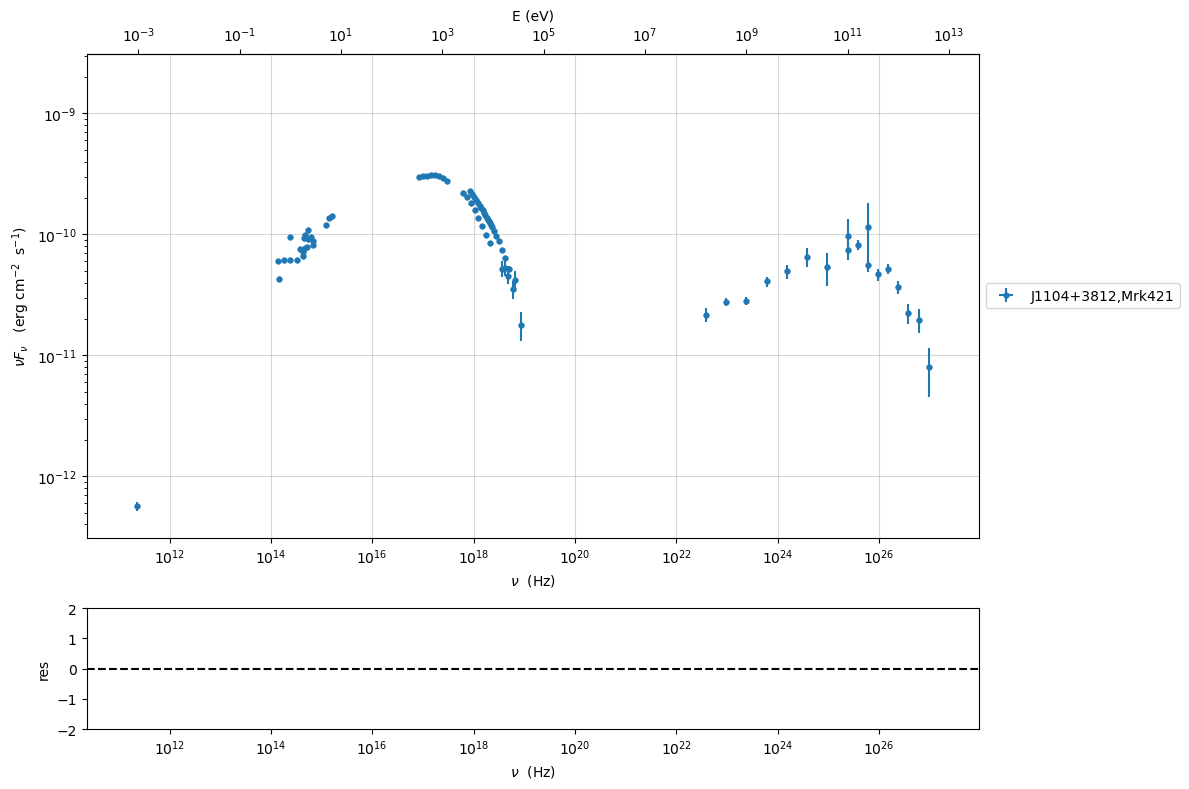

In [23]:
from jetset.plot_sedfit import PlotSED
myPlot=PlotSED(sed_data)

or you can create the object to plot on the fly in this way

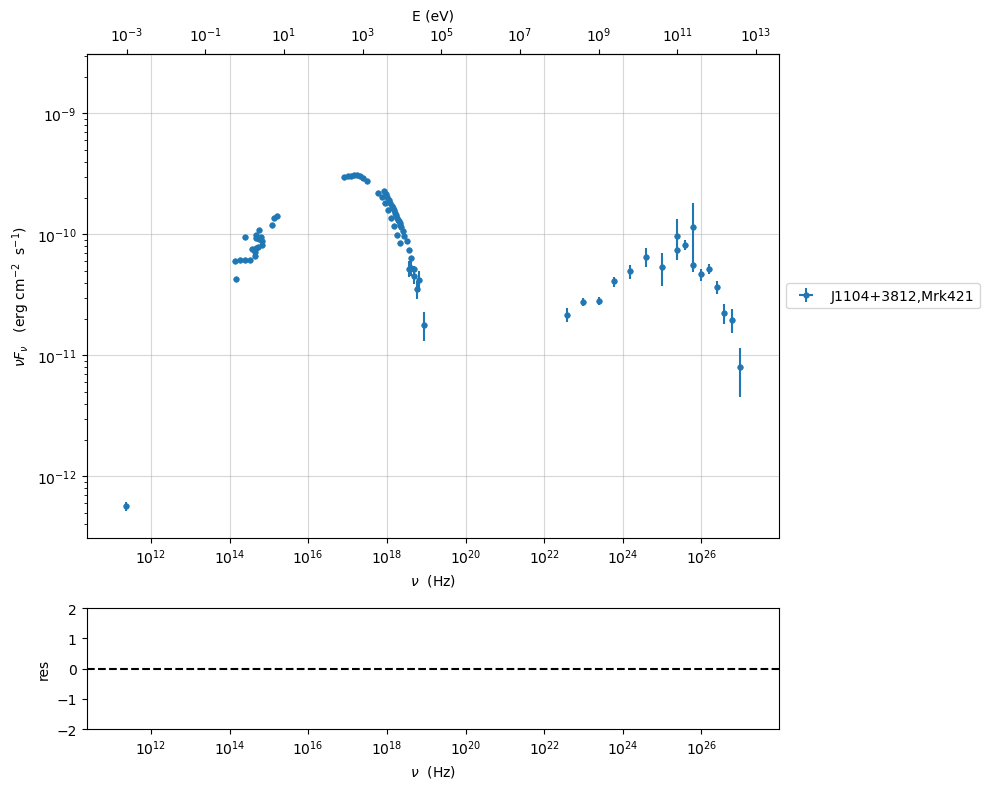

In [24]:
myPlot=sed_data.plot_sed()


you can rescale your plot

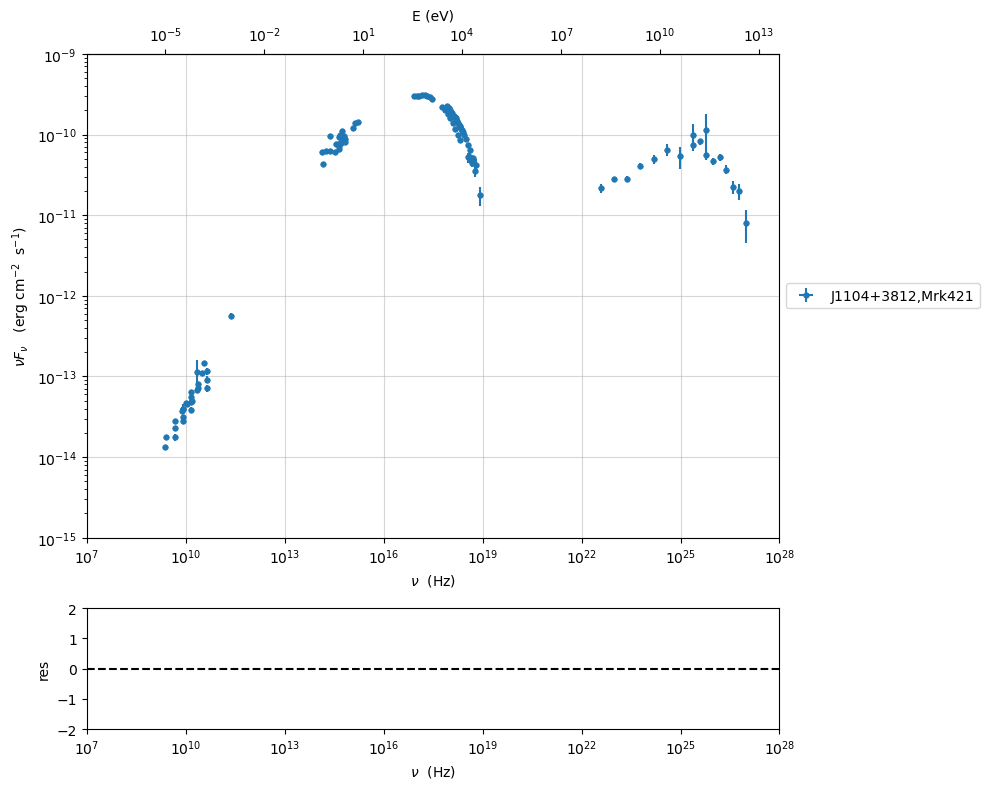

In [25]:
myPlot=sed_data.plot_sed()
myPlot.setlim(x_min=1E7,x_max=1E28,y_min=1E-15,y_max=1E-9)

plotting in the ``src`` restframe

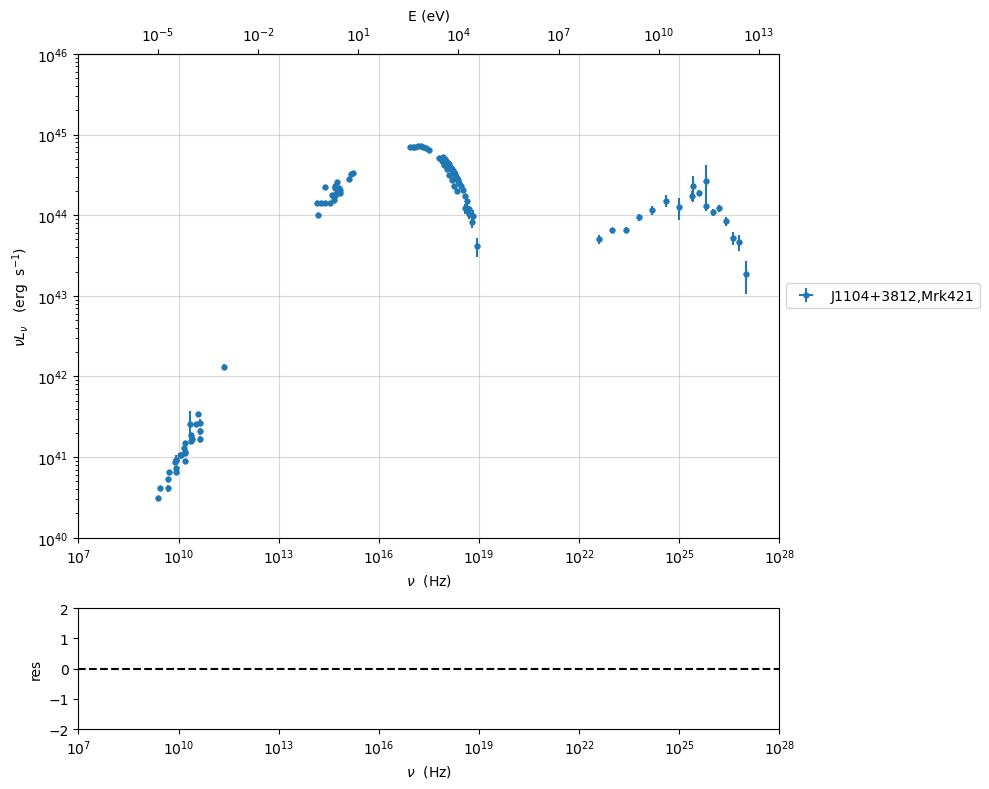

In [26]:
myPlot=sed_data.plot_sed(frame='src')
myPlot.setlim(x_min=1E7,x_max=1E28,y_min=1E40,y_max=1E46)

**to have interactive plot in jupyter**


if you want to to have interacitve plot in a jupyter notebook use:

.. code-block:: no

    %matplotlib notebook

to have interactive plot in jupyter lab use:

.. code-block:: no
 
    %matplotlib widget


### Grouping data

As you can see, due to the overlapping of different instruments and to different time snapshots, 
some points have multiple values. Although this is not a problem for the fit process, you might 
want to rebin (group) your data. This can be obtained with the following command:


***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



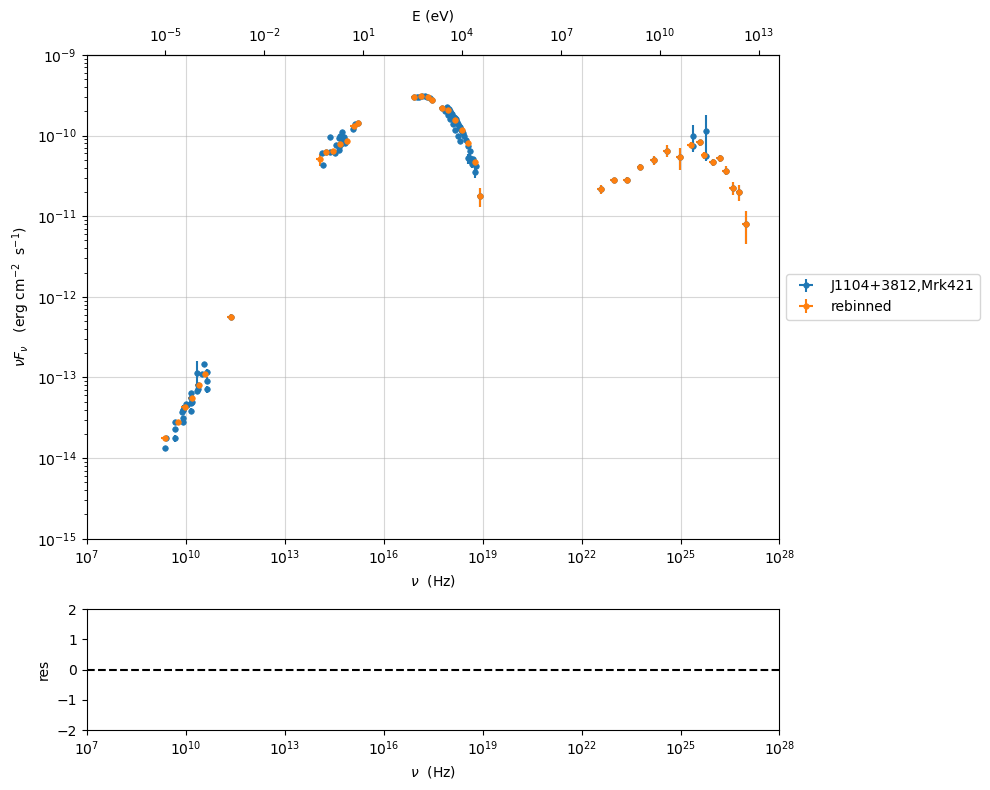

In [27]:
%matplotlib inline

myPlot=sed_data.plot_sed()
sed_data.group_data(bin_width=0.2)
myPlot.add_data_plot(sed_data,label='rebinned')
myPlot.setlim(x_min=1E7,x_max=1E28,y_min=1E-15,y_max=1E-9)


### Handling errors and systematics

Another important issue when dealing with fitting of data, is the proper handling of errors.
Typically one might need to add systematics for different reasons:
 
 - data are not really simultaneous, and you want to add systematics to take this into account
 - data (typically IR up to UV), might have very small errors compared to those at higher energies.
   This might bias the minimizer to accommodate the parameters  in order to fit 'better' the low
   frequencies branch.
  
For these reasons the package offer the possibility to add systematics 
  
  

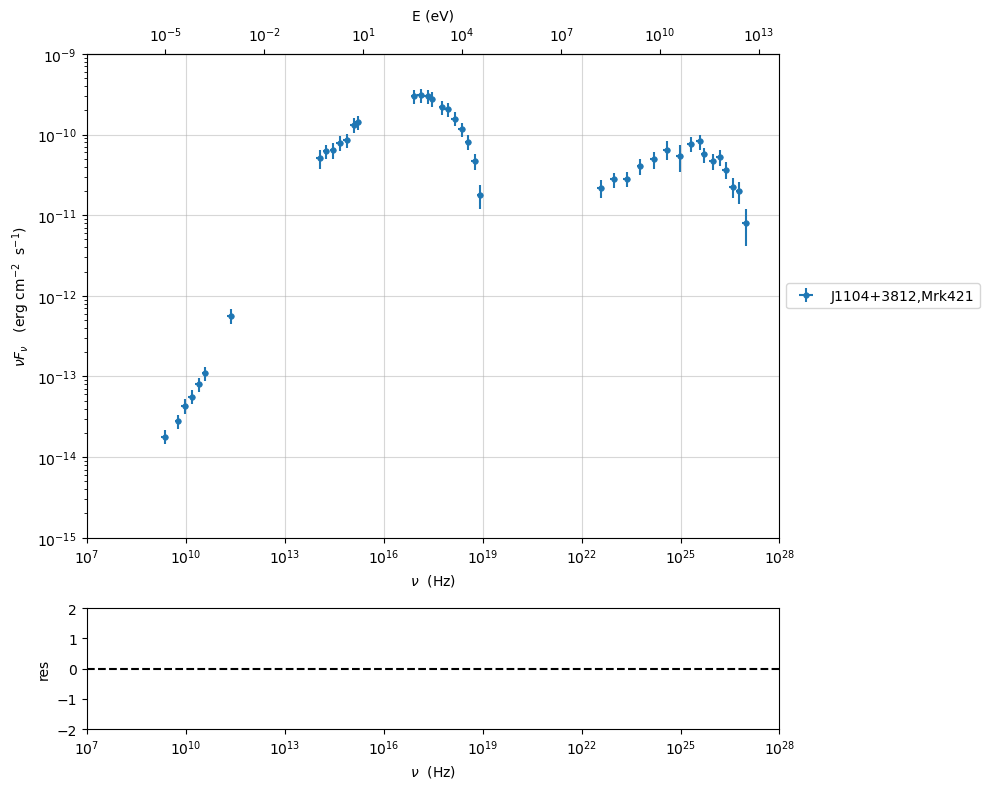

In [28]:
sed_data.add_systematics(0.2,[10.**6,10.**29])
myPlot=sed_data.plot_sed()
myPlot.setlim(x_min=1E7,x_max=1E28,y_min=1E-15,y_max=1E-9)

### Filtering data sets 


we use the `show_data_sets()`  method to have know wich data sets are defined in our table

In [29]:
sed_data.show_data_sets()


current datasets
dataset 0.0


we use `show_dataset=True` to have the legend of all the datasets 

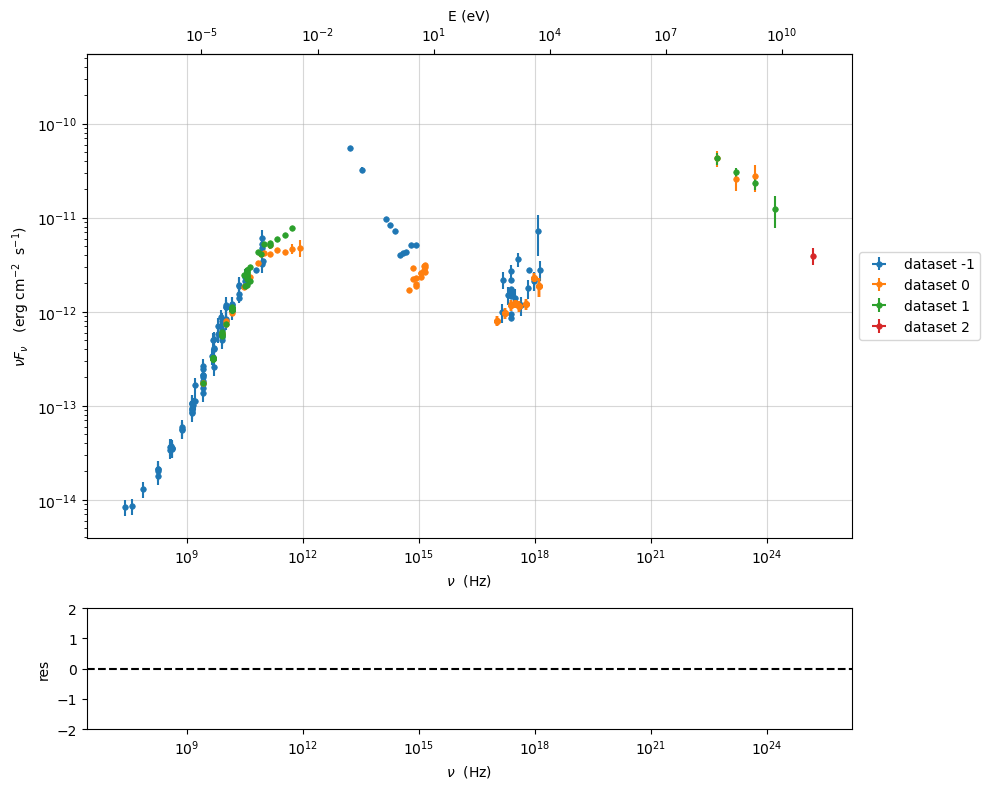

In [30]:
data=Data.from_file(test_SEDs[0])
sed_data=ObsData(data_table=data)
%matplotlib inline
p=sed_data.plot_sed(show_dataset=True)

In [31]:
sed_data.show_data_sets()


current datasets
dataset -1
dataset 0
dataset 1
dataset 2


we filter out the data set `-1` using the `filter_data_set()` method. Please not with `exclude=True` we exclude dataset in `filters`

---> excluding  data_set/s ['-1']
filter -1 192
current datasets
dataset 0
dataset 1
dataset 2
---> data sets left after filtering None
---> data len after filtering=192
current datasets
dataset 0
dataset 1
dataset 2


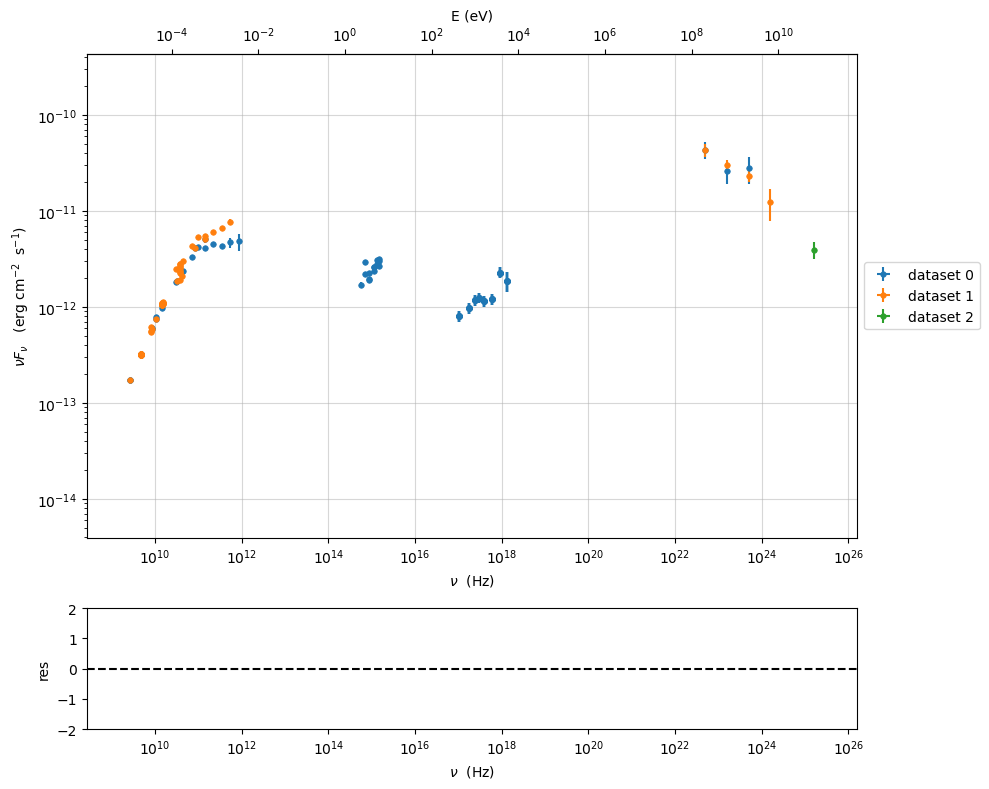

In [32]:
sed_data.filter_data_set(filters='-1',exclude=True)
sed_data.show_data_sets()
p=sed_data.plot_sed(show_dataset=True)

we can pass more datasets, comma separated 

---> excluding  data_set/s ['-1', '0']
filter -1 192
filter 0 57
current datasets
dataset 1
dataset 2
---> data sets left after filtering None
---> data len after filtering=57
current datasets
dataset 1
dataset 2


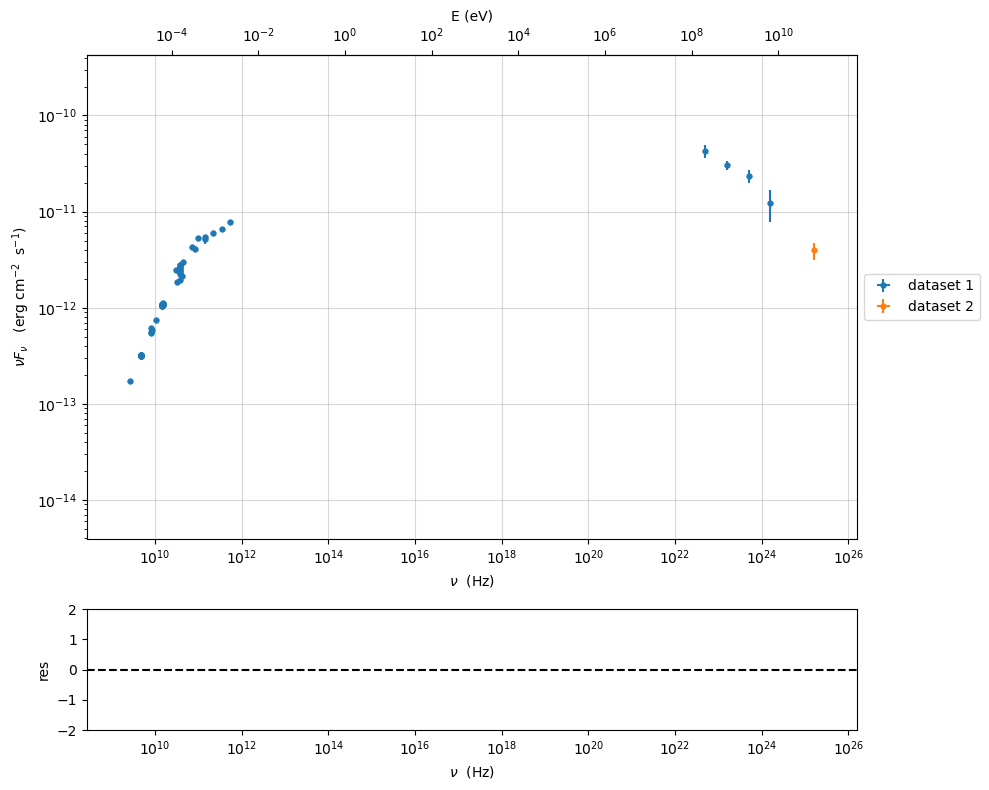

In [33]:
sed_data.filter_data_set(filters='-1,0',exclude=True)
sed_data.show_data_sets()
p=sed_data.plot_sed(show_dataset=True)

we can also use `filter_data_set` to exclude *only* the datasets in `filters` with `exclude=False`

---> excluding  data_set/s ['-1']
filter -1 192
current datasets
dataset 0
dataset 1
dataset 2
---> data sets left after filtering None
---> data len after filtering=192
current datasets
dataset 0
dataset 1
dataset 2


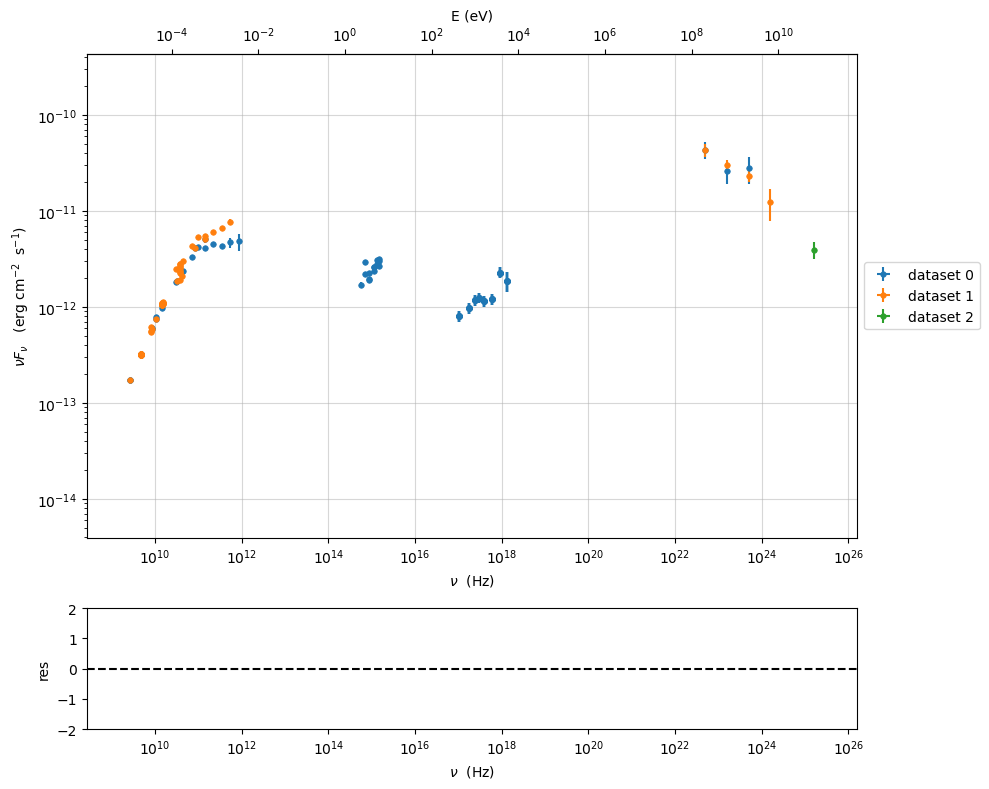

In [34]:
sed_data.filter_data_set(filters='-1',exclude=True)
sed_data.show_data_sets()
p=sed_data.plot_sed(show_dataset=True)

we can revert `sed_data` to the original state with the `reset_data()` method

In [35]:
sed_data.reset_data()

current datasets
dataset -1
dataset 0
dataset 1
dataset 2


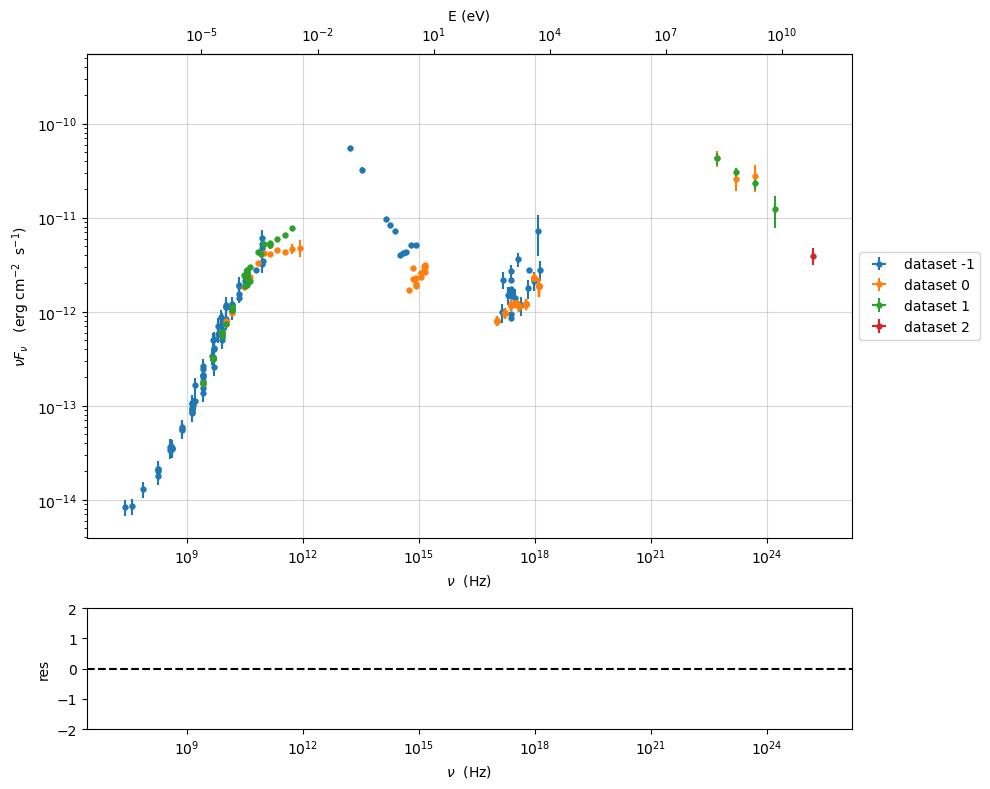

In [36]:
sed_data.show_data_sets()
p=sed_data.plot_sed(show_dataset=True)

### Saving sed_data and loading

you can save and relaod you sed_data

In [37]:
sed_data.save('3C454_data.pkl')

In [38]:
sed_data=ObsData.load('3C454_data.pkl')

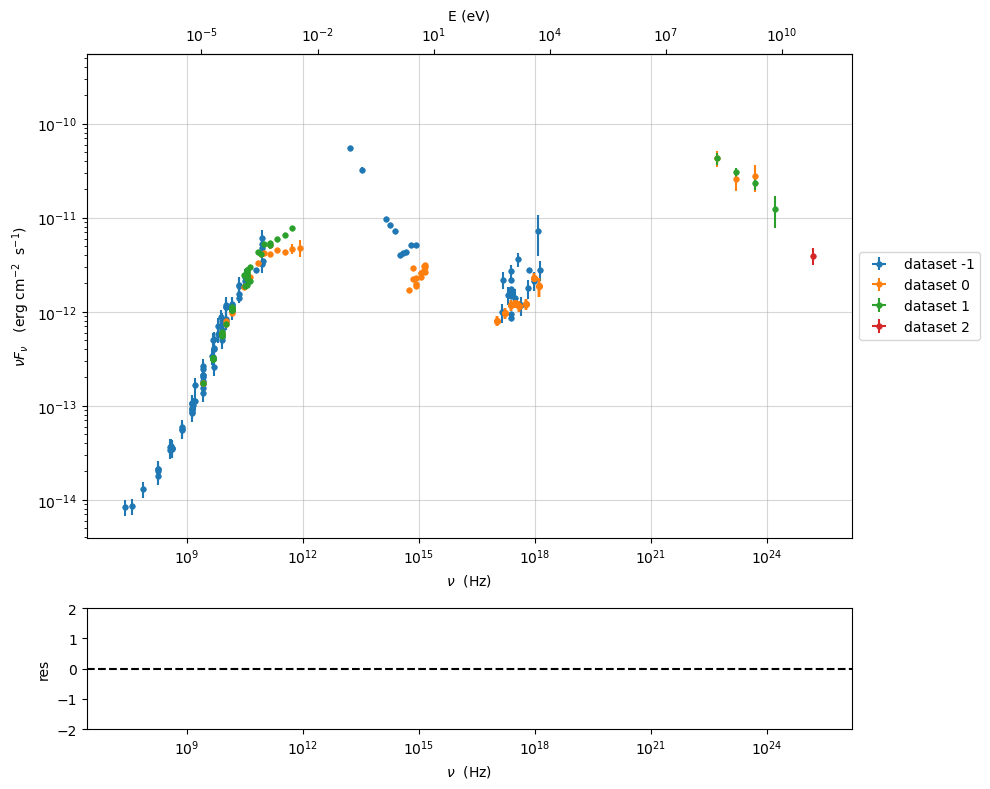

In [39]:
p=sed_data.plot_sed(show_dataset=True)